In [50]:
import torch
import torch.optim as optim
import torch.utils.data
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#--- hyperparameters ---
N_EPOCHS = 10
BATCH_SIZE_TRAIN = 100
BATCH_SIZE_TEST = 100
LR = 0.001

In [18]:
#--- fixed constants ---
NUM_CLASSES = 24
DATA_DIR = '../data/sign_mnist_%s'

In [19]:
# --- Dataset initialization ---

# We transform image files' contents to tensors
# Plus, we can add random transformations to the training data if we like
# Think on what kind of transformations may be meaningful for this data.
# Eg., horizontal-flip is definitely a bad idea for sign language data.
# You can use another transformation here if you find a better one.
train_transform = transforms.Compose([
                                        #transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor()])
test_transform = transforms.Compose([transforms.ToTensor()])

train_set = datasets.ImageFolder(DATA_DIR % 'train', transform=train_transform)
dev_set   = datasets.ImageFolder(DATA_DIR % 'dev',   transform=test_transform)
test_set  = datasets.ImageFolder(DATA_DIR % 'test',  transform=test_transform)


# Create Pytorch data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE_TEST, shuffle=False)

In [20]:
#--- model ---
class CNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(7*7*32, NUM_CLASSES)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


using cpu
Training: Epoch 0 - Batch 0/275: Loss: 3.3201 | Train Acc: 4.000% (4/100)
Training: Epoch 0 - Batch 1/275: Loss: 7.1118 | Train Acc: 6.000% (12/200)
Training: Epoch 0 - Batch 2/275: Loss: 7.9793 | Train Acc: 5.667% (17/300)
Training: Epoch 0 - Batch 3/275: Loss: 8.1188 | Train Acc: 5.250% (21/400)
Training: Epoch 0 - Batch 4/275: Loss: 7.7453 | Train Acc: 5.200% (26/500)
Training: Epoch 0 - Batch 5/275: Loss: 7.3097 | Train Acc: 5.333% (32/600)
Training: Epoch 0 - Batch 6/275: Loss: 6.9129 | Train Acc: 5.714% (40/700)
Training: Epoch 0 - Batch 7/275: Loss: 6.6011 | Train Acc: 5.750% (46/800)
Training: Epoch 0 - Batch 8/275: Loss: 6.3368 | Train Acc: 5.778% (52/900)
Training: Epoch 0 - Batch 9/275: Loss: 6.1253 | Train Acc: 6.100% (61/1000)
Training: Epoch 0 - Batch 10/275: Loss: 5.8822 | Train Acc: 6.545% (72/1100)
Training: Epoch 0 - Batch 11/275: Loss: 5.6701 | Train Acc: 7.833% (94/1200)
Training: Epoch 0 - Batch 12/275: Loss: 5.4814 | Train Acc: 8.769% (114/1300)
Training

Training: Epoch 0 - Batch 104/275: Loss: 1.7539 | Train Acc: 58.105% (6101/10500)
Training: Epoch 0 - Batch 105/275: Loss: 1.7424 | Train Acc: 58.396% (6190/10600)
Training: Epoch 0 - Batch 106/275: Loss: 1.7306 | Train Acc: 58.710% (6282/10700)
Training: Epoch 0 - Batch 107/275: Loss: 1.7187 | Train Acc: 59.037% (6376/10800)
Training: Epoch 0 - Batch 108/275: Loss: 1.7100 | Train Acc: 59.211% (6454/10900)
Training: Epoch 0 - Batch 109/275: Loss: 1.7010 | Train Acc: 59.445% (6539/11000)
Training: Epoch 0 - Batch 110/275: Loss: 1.6895 | Train Acc: 59.721% (6629/11100)
Training: Epoch 0 - Batch 111/275: Loss: 1.6783 | Train Acc: 60.027% (6723/11200)
Training: Epoch 0 - Batch 112/275: Loss: 1.6678 | Train Acc: 60.292% (6813/11300)
Training: Epoch 0 - Batch 113/275: Loss: 1.6574 | Train Acc: 60.570% (6905/11400)
Training: Epoch 0 - Batch 114/275: Loss: 1.6475 | Train Acc: 60.783% (6990/11500)
Training: Epoch 0 - Batch 115/275: Loss: 1.6375 | Train Acc: 61.017% (7078/11600)
Training: Epoch 

Training: Epoch 0 - Batch 205/275: Loss: 1.0919 | Train Acc: 75.243% (15500/20600)
Training: Epoch 0 - Batch 206/275: Loss: 1.0881 | Train Acc: 75.343% (15596/20700)
Training: Epoch 0 - Batch 207/275: Loss: 1.0847 | Train Acc: 75.418% (15687/20800)
Training: Epoch 0 - Batch 208/275: Loss: 1.0814 | Train Acc: 75.502% (15780/20900)
Training: Epoch 0 - Batch 209/275: Loss: 1.0782 | Train Acc: 75.567% (15869/21000)
Training: Epoch 0 - Batch 210/275: Loss: 1.0746 | Train Acc: 75.659% (15964/21100)
Training: Epoch 0 - Batch 211/275: Loss: 1.0708 | Train Acc: 75.769% (16063/21200)
Training: Epoch 0 - Batch 212/275: Loss: 1.0673 | Train Acc: 75.854% (16157/21300)
Training: Epoch 0 - Batch 213/275: Loss: 1.0634 | Train Acc: 75.967% (16257/21400)
Training: Epoch 0 - Batch 214/275: Loss: 1.0597 | Train Acc: 76.070% (16355/21500)
Training: Epoch 0 - Batch 215/275: Loss: 1.0560 | Train Acc: 76.171% (16453/21600)
Training: Epoch 0 - Batch 216/275: Loss: 1.0525 | Train Acc: 76.267% (16550/21700)
Trai

Training: Epoch 1 - Batch 32/275: Loss: 0.3202 | Train Acc: 97.091% (3204/3300)
Training: Epoch 1 - Batch 33/275: Loss: 0.3246 | Train Acc: 96.941% (3296/3400)
Training: Epoch 1 - Batch 34/275: Loss: 0.3254 | Train Acc: 96.771% (3387/3500)
Training: Epoch 1 - Batch 35/275: Loss: 0.3251 | Train Acc: 96.722% (3482/3600)
Training: Epoch 1 - Batch 36/275: Loss: 0.3247 | Train Acc: 96.649% (3576/3700)
Training: Epoch 1 - Batch 37/275: Loss: 0.3227 | Train Acc: 96.737% (3676/3800)
Training: Epoch 1 - Batch 38/275: Loss: 0.3207 | Train Acc: 96.795% (3775/3900)
Training: Epoch 1 - Batch 39/275: Loss: 0.3188 | Train Acc: 96.825% (3873/4000)
Training: Epoch 1 - Batch 40/275: Loss: 0.3179 | Train Acc: 96.854% (3971/4100)
Training: Epoch 1 - Batch 41/275: Loss: 0.3172 | Train Acc: 96.905% (4070/4200)
Training: Epoch 1 - Batch 42/275: Loss: 0.3160 | Train Acc: 96.930% (4168/4300)
Training: Epoch 1 - Batch 43/275: Loss: 0.3161 | Train Acc: 96.909% (4264/4400)
Training: Epoch 1 - Batch 44/275: Loss: 

Training: Epoch 1 - Batch 134/275: Loss: 0.3206 | Train Acc: 96.970% (13091/13500)
Training: Epoch 1 - Batch 135/275: Loss: 0.3204 | Train Acc: 96.978% (13189/13600)
Training: Epoch 1 - Batch 136/275: Loss: 0.3202 | Train Acc: 96.993% (13288/13700)
Training: Epoch 1 - Batch 137/275: Loss: 0.3201 | Train Acc: 96.993% (13385/13800)
Training: Epoch 1 - Batch 138/275: Loss: 0.3198 | Train Acc: 96.993% (13482/13900)
Training: Epoch 1 - Batch 139/275: Loss: 0.3193 | Train Acc: 97.007% (13581/14000)
Training: Epoch 1 - Batch 140/275: Loss: 0.3187 | Train Acc: 97.028% (13681/14100)
Training: Epoch 1 - Batch 141/275: Loss: 0.3180 | Train Acc: 97.042% (13780/14200)
Training: Epoch 1 - Batch 142/275: Loss: 0.3179 | Train Acc: 97.042% (13877/14300)
Training: Epoch 1 - Batch 143/275: Loss: 0.3180 | Train Acc: 97.014% (13970/14400)
Training: Epoch 1 - Batch 144/275: Loss: 0.3177 | Train Acc: 97.028% (14069/14500)
Training: Epoch 1 - Batch 145/275: Loss: 0.3176 | Train Acc: 97.041% (14168/14600)
Trai

Training: Epoch 1 - Batch 235/275: Loss: 0.3246 | Train Acc: 97.093% (22914/23600)
Training: Epoch 1 - Batch 236/275: Loss: 0.3250 | Train Acc: 97.080% (23008/23700)
Training: Epoch 1 - Batch 237/275: Loss: 0.3253 | Train Acc: 97.084% (23106/23800)
Training: Epoch 1 - Batch 238/275: Loss: 0.3253 | Train Acc: 97.084% (23203/23900)
Training: Epoch 1 - Batch 239/275: Loss: 0.3254 | Train Acc: 97.083% (23300/24000)
Training: Epoch 1 - Batch 240/275: Loss: 0.3255 | Train Acc: 97.087% (23398/24100)
Training: Epoch 1 - Batch 241/275: Loss: 0.3258 | Train Acc: 97.087% (23495/24200)
Training: Epoch 1 - Batch 242/275: Loss: 0.3263 | Train Acc: 97.074% (23589/24300)
Training: Epoch 1 - Batch 243/275: Loss: 0.3268 | Train Acc: 97.061% (23683/24400)
Training: Epoch 1 - Batch 244/275: Loss: 0.3270 | Train Acc: 97.057% (23779/24500)
Training: Epoch 1 - Batch 245/275: Loss: 0.3270 | Train Acc: 97.069% (23879/24600)
Training: Epoch 1 - Batch 246/275: Loss: 0.3270 | Train Acc: 97.073% (23977/24700)
Trai

Training: Epoch 2 - Batch 62/275: Loss: 0.3572 | Train Acc: 97.492% (6142/6300)
Training: Epoch 2 - Batch 63/275: Loss: 0.3562 | Train Acc: 97.516% (6241/6400)
Training: Epoch 2 - Batch 64/275: Loss: 0.3557 | Train Acc: 97.523% (6339/6500)
Training: Epoch 2 - Batch 65/275: Loss: 0.3542 | Train Acc: 97.545% (6438/6600)
Training: Epoch 2 - Batch 66/275: Loss: 0.3540 | Train Acc: 97.552% (6536/6700)
Training: Epoch 2 - Batch 67/275: Loss: 0.3539 | Train Acc: 97.559% (6634/6800)
Training: Epoch 2 - Batch 68/275: Loss: 0.3544 | Train Acc: 97.565% (6732/6900)
Training: Epoch 2 - Batch 69/275: Loss: 0.3552 | Train Acc: 97.571% (6830/7000)
Training: Epoch 2 - Batch 70/275: Loss: 0.3555 | Train Acc: 97.563% (6927/7100)
Training: Epoch 2 - Batch 71/275: Loss: 0.3550 | Train Acc: 97.583% (7026/7200)
Training: Epoch 2 - Batch 72/275: Loss: 0.3539 | Train Acc: 97.603% (7125/7300)
Training: Epoch 2 - Batch 73/275: Loss: 0.3532 | Train Acc: 97.635% (7225/7400)
Training: Epoch 2 - Batch 74/275: Loss: 

Training: Epoch 2 - Batch 165/275: Loss: 0.3648 | Train Acc: 97.235% (16141/16600)
Training: Epoch 2 - Batch 166/275: Loss: 0.3651 | Train Acc: 97.216% (16235/16700)
Training: Epoch 2 - Batch 167/275: Loss: 0.3651 | Train Acc: 97.208% (16331/16800)
Training: Epoch 2 - Batch 168/275: Loss: 0.3651 | Train Acc: 97.207% (16428/16900)
Training: Epoch 2 - Batch 169/275: Loss: 0.3652 | Train Acc: 97.182% (16521/17000)
Training: Epoch 2 - Batch 170/275: Loss: 0.3651 | Train Acc: 97.175% (16617/17100)
Training: Epoch 2 - Batch 171/275: Loss: 0.3646 | Train Acc: 97.174% (16714/17200)
Training: Epoch 2 - Batch 172/275: Loss: 0.3646 | Train Acc: 97.173% (16811/17300)
Training: Epoch 2 - Batch 173/275: Loss: 0.3647 | Train Acc: 97.167% (16907/17400)
Training: Epoch 2 - Batch 174/275: Loss: 0.3647 | Train Acc: 97.183% (17007/17500)
Training: Epoch 2 - Batch 175/275: Loss: 0.3645 | Train Acc: 97.188% (17105/17600)
Training: Epoch 2 - Batch 176/275: Loss: 0.3642 | Train Acc: 97.192% (17203/17700)
Trai

Training: Epoch 2 - Batch 266/275: Loss: 0.3664 | Train Acc: 97.169% (25944/26700)
Training: Epoch 2 - Batch 267/275: Loss: 0.3665 | Train Acc: 97.164% (26040/26800)
Training: Epoch 2 - Batch 268/275: Loss: 0.3665 | Train Acc: 97.175% (26140/26900)
Training: Epoch 2 - Batch 269/275: Loss: 0.3664 | Train Acc: 97.178% (26238/27000)
Training: Epoch 2 - Batch 270/275: Loss: 0.3662 | Train Acc: 97.181% (26336/27100)
Training: Epoch 2 - Batch 271/275: Loss: 0.3660 | Train Acc: 97.188% (26435/27200)
Training: Epoch 2 - Batch 272/275: Loss: 0.3658 | Train Acc: 97.194% (26534/27300)
Training: Epoch 2 - Batch 273/275: Loss: 0.3657 | Train Acc: 97.201% (26633/27400)
Training: Epoch 2 - Batch 274/275: Loss: 0.3659 | Train Acc: 97.203% (26687/27455)
Epoch train loss: 100.63128525018692
Previous epoch train loss: 90.19846704602242
early stopping


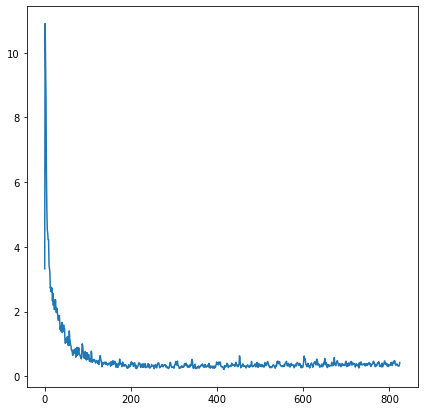

In [59]:
#--- set up ---
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('using gpu')
else:
    print('using cpu')
    device = torch.device('cpu')

model = CNN().to(device)

# OPTIMIZERS
optimizer_1 = optim.Adam(model.parameters(), lr=LR, weight_decay=0.01)
optimizer_2 = optim.RMSprop(model.parameters(), lr=LR, weight_decay=0.1)
optimizer_3 = optim.SGD(model.parameters(), lr=LR, momentum=0.5)
loss_function = nn.CrossEntropyLoss()

optimizer = optimizer_2

#--- training ---

previous_train_loss = 1000000

batch_losses = []

for epoch in range(N_EPOCHS):
    train_loss = 0
    train_correct = 0
    total = 0
    for batch_num, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        # Compute prediction error
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_function(pred, target)

        train_loss += loss.item()
        
        batch_losses.append(loss.item())
        
        total += len(target)
        train_correct += torch.sum(pred.argmax(1) == target)
        
        # Backpropagation
        loss.backward()
        optimizer.step()

        print('Training: Epoch %d - Batch %d/%d: Loss: %.4f | Train Acc: %.3f%% (%d/%d)' % 
              (epoch, batch_num, len(train_loader), train_loss / (batch_num + 1), 
               100. * train_correct / total, train_correct, total))
    
    print("Epoch train loss: " + str(train_loss))
    print("Previous epoch train loss: " + str(previous_train_loss))
    
    # EARLY STOPPING
    if train_loss > previous_train_loss:
        print('early stopping')
        break
        
    previous_train_loss = train_loss

plt.figure(figsize=(7, 7))
plt.plot(batch_losses)
plt.show()

Evaluating: Batch 0/37: Loss: 0.6879 | Test Acc: 86.000% (86/100)
Evaluating: Batch 1/37: Loss: 0.5992 | Test Acc: 88.000% (176/200)
Evaluating: Batch 2/37: Loss: 0.5451 | Test Acc: 91.333% (274/300)
Evaluating: Batch 3/37: Loss: 0.5356 | Test Acc: 91.250% (365/400)
Evaluating: Batch 4/37: Loss: 0.5884 | Test Acc: 88.800% (444/500)
Evaluating: Batch 5/37: Loss: 0.5526 | Test Acc: 90.167% (541/600)
Evaluating: Batch 6/37: Loss: 0.5036 | Test Acc: 91.286% (639/700)
Evaluating: Batch 7/37: Loss: 0.4796 | Test Acc: 92.375% (739/800)
Evaluating: Batch 8/37: Loss: 0.4651 | Test Acc: 92.889% (836/900)
Evaluating: Batch 9/37: Loss: 0.4640 | Test Acc: 92.800% (928/1000)
Evaluating: Batch 10/37: Loss: 0.4776 | Test Acc: 92.364% (1016/1100)
Evaluating: Batch 11/37: Loss: 0.5365 | Test Acc: 90.583% (1087/1200)
Evaluating: Batch 12/37: Loss: 0.5814 | Test Acc: 89.538% (1164/1300)
Evaluating: Batch 13/37: Loss: 0.6242 | Test Acc: 89.071% (1247/1400)
Evaluating: Batch 14/37: Loss: 0.6249 | Test Acc: 

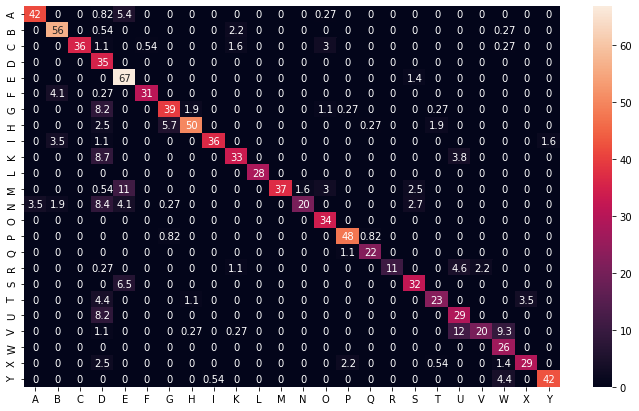

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#--- test ---
test_loss = 0
test_correct = 0
total = 0

preds = []
targets = []

with torch.no_grad():
    for batch_num, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        
        pred = model(data)
        loss = loss_function(pred, target)
        
        test_loss += loss.item()
        total += len(target)
        test_correct += torch.sum(pred.argmax(1) == target)
        preds.extend(pred.argmax(1).cpu().numpy())
        targets.extend(target.cpu().numpy())

        print('Evaluating: Batch %d/%d: Loss: %.4f | Test Acc: %.3f%% (%d/%d)' % 
              (batch_num, len(test_loader), test_loss / (batch_num + 1), 
               100. * test_correct / total, test_correct, total))

    cf_matrix = confusion_matrix(targets, preds)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix) * 1000, 
                         index = [i for i in 'ABCDEFGHIKLMNOPQRSTUVWXY'],
                         columns=[i for i in 'ABCDEFGHIKLMNOPQRSTUVWXY'])
    plt.figure(figsize=(12, 7))
    sn.heatmap(df_cm, annot=True)